<a href="https://colab.research.google.com/github/Ahalya24/fastai/blob/master/Part1_Lesson2_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n=100

In [29]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.5638,  1.0000],
        [ 0.4313,  1.0000],
        [-0.6637,  1.0000],
        [ 0.3140,  1.0000],
        [ 0.4773,  1.0000]])

In [30]:
a = tensor(3.,2); a


tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)


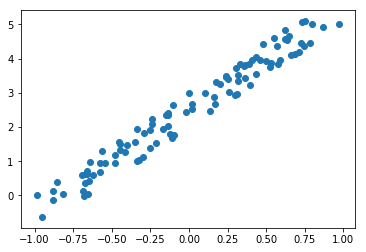

In [32]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a=tensor(1.,1)

In [35]:
y_hat = x@a
mse(y_hat,y)

tensor(3.3693)

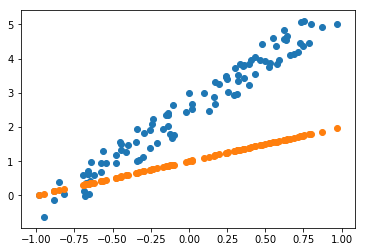

In [38]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [39]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([1., 1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [41]:
lr = 1e-1
for t in range(100): 
  update()

tensor(3.3693, grad_fn=<MeanBackward0>)
tensor(0.4438, grad_fn=<MeanBackward0>)
tensor(0.2016, grad_fn=<MeanBackward0>)
tensor(0.1280, grad_fn=<MeanBackward0>)
tensor(0.1032, grad_fn=<MeanBackward0>)
tensor(0.0947, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0909, grad_fn=<MeanBackward0>)
tensor(0.0906, grad_fn=<MeanBackward0>)
tensor(0.0905, grad_fn=<MeanBackward0>)


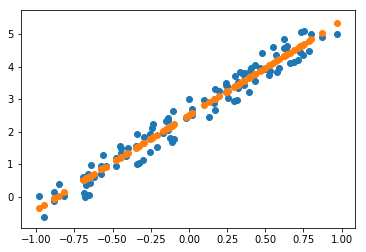

In [42]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [44]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)